# Analysis of Road Accidents in the UK

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
plt.style.use("classic")

In [4]:
# read accident data
acc_df = pd.read_csv("./data/working_sets/final_acc_adj.csv", low_memory=False, index_col=False)

In [5]:
# # pickle data to save (dump)
# with open("./data/working_sets/accident_data.pkl", "wb") as f: # wb = write binary
#     pickle.dump(acc_df, f)

In [6]:
# import data from pkl file
# load pickled data
with open("./data/working_sets/accident_data.pkl", "rb") as f:
    acc = pickle.load(f)

In [7]:
acc.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,highway,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions,urban_rural,police_attended,adjusted_severity
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,E09000020,6,30.0,1,2,2,0,1,1,0.000000
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,E09000020,3,30.0,4,1,1,0,1,1,0.985663
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,E09000020,6,30.0,4,1,1,0,1,1,0.913618
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,E09000020,6,30.0,1,1,1,0,1,1,0.825884
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,E09000020,6,30.0,7,1,2,0,1,1,0.702079


## Feature Engineering

In [8]:
acc.nunique()

accident_index             2178381
longitude                  1502623
latitude                    471453
police_force                    51
accident_severity                3
num_veh                         30
num_cas                         52
date                          5478
day                              7
time                          1439
district                       416
highway                        207
road_type                        6
speed_limit                      9
light_conditions                 5
weather_conditions               9
road_surface_conditions          5
special_conditions               8
urban_rural                      3
police_attended                  3
adjusted_severity          1514733
dtype: int64

### Creating Proxy Severity Column
This value is a proxy target value created for use in machine learning models

<AxesSubplot:>

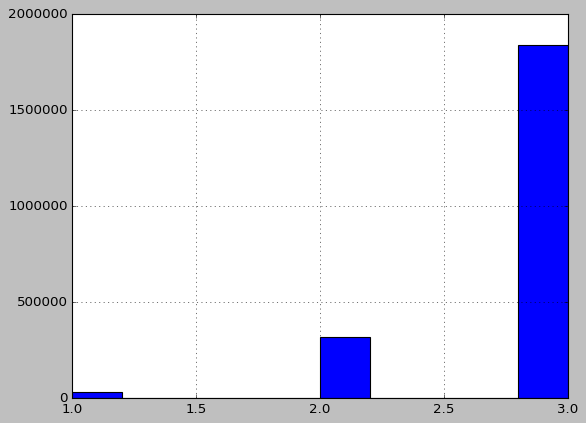

In [14]:
# create adjusted severity value
prep = acc.copy()
prep.accident_severity.hist()

<AxesSubplot:>

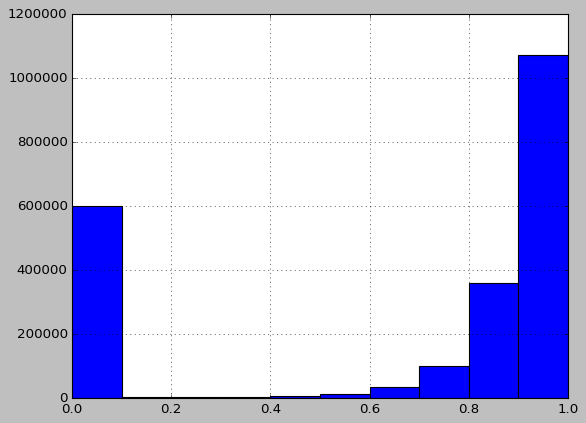

In [15]:
# create adjusted severity value
prep = acc.copy()
prep["temp_sev"] = ((prep["adjusted_severity"]))
prep.temp_sev.hist()

<AxesSubplot:>

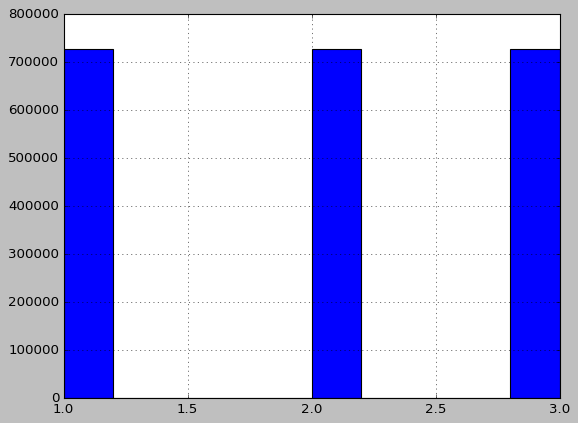

In [16]:
# create proxy categorical bins
quantiles = [prep["temp_sev"].quantile(0.3334), prep["temp_sev"].quantile(0.6667), prep["temp_sev"].quantile(1)]

conditions = [
    (prep["temp_sev"] <= quantiles[0]),
    (prep["temp_sev"] > quantiles[0]) & (prep["temp_sev"] <= quantiles[1]) ,
    (prep["temp_sev"] > quantiles[1])
]

values = [1,2,3]

prep["proxy_severity"] = np.select(conditions, values)
prep.proxy_severity.hist()

In [17]:
prep.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions,urban_rural,police_attended,adjusted_severity,temp_sev,proxy_severity
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,30.0,1,2,2,0,1,1,0.000000,0.000000,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,30.0,4,1,1,0,1,1,0.985663,0.985663,3
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,30.0,4,1,1,0,1,1,0.913618,0.913618,2
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,30.0,1,1,1,0,1,1,0.825884,0.825884,2
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,30.0,7,1,2,0,1,1,0.702079,0.702079,1


In [18]:
drop_sevs = ["temp_sev"]
prep = prep.drop(drop_sevs, axis=1)
prep.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,special_conditions,urban_rural,police_attended,adjusted_severity,proxy_severity
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,6,30.0,1,2,2,0,1,1,0.000000,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,3,30.0,4,1,1,0,1,1,0.985663,3
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,6,30.0,4,1,1,0,1,1,0.913618,2
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,6,30.0,1,1,1,0,1,1,0.825884,2
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,6,30.0,7,1,2,0,1,1,0.702079,1


In [19]:
# # SAVE to pickle
# with open("./data/working_sets/accident_data_prep.pkl", "wb") as f: # wb = write binary
#     pickle.dump(prep, f)

In [20]:
# # import data from pkl file
# # load pickled data
# with open("./data/working_sets/accident_data_prep.pkl", "rb") as f:
#     prep = pickle.load(f)

### Adjust Data Types

In [21]:
prep.dtypes

accident_index              object
longitude                  float64
latitude                   float64
police_force                 int64
accident_severity            int64
num_veh                      int64
num_cas                      int64
date                        object
day                          int64
time                        object
district                     int64
highway                     object
road_type                    int64
speed_limit                float64
light_conditions             int64
weather_conditions           int64
road_surface_conditions      int64
special_conditions           int64
urban_rural                  int64
police_attended              int64
adjusted_severity          float64
proxy_severity               int32
dtype: object

#### Drop Attributes with No Value

In [22]:
# drop non-valuable columns

# will drop accident_index later, when i know i dont need it.
no_value = ["special_conditions"]
prep_drop_no_val = prep.drop(no_value, axis=1)
prep.columns

Index(['accident_index', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'num_veh', 'num_cas', 'date', 'day', 'time',
       'district', 'highway', 'road_type', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'special_conditions',
       'urban_rural', 'police_attended', 'adjusted_severity',
       'proxy_severity'],
      dtype='object')

In [23]:
prep_drop_no_val.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,2178381.0,-1.370208,1.397579,-7.525273,-2.281397,-1.324291,-0.190144,1.76201
latitude,2178381.0,52.512877,1.431890,49.912360,51.475810,52.119030,53.417230,60.75754
police_force,2178381.0,30.478835,25.091818,1.000000,7.000000,31.000000,46.000000,98.00000
accident_severity,2178381.0,2.829111,0.409456,1.000000,3.000000,3.000000,3.000000,3.00000
num_veh,2178381.0,1.835501,0.715937,1.000000,1.000000,2.000000,2.000000,67.00000
num_cas,2178381.0,1.343693,0.812728,1.000000,1.000000,1.000000,1.000000,93.00000
day,2178381.0,4.113625,1.923597,1.000000,2.000000,4.000000,6.000000,7.00000
district,2178381.0,350.578609,256.480382,1.000000,122.000000,328.000000,531.000000,941.00000
road_type,2178381.0,5.165294,1.651671,1.000000,6.000000,6.000000,6.000000,9.00000
speed_limit,2178381.0,38.770839,14.196054,0.000000,30.000000,30.000000,50.000000,70.00000


### Geographical Coordinates (Longitude and Latitude)

Will look at grouping these coordinates into groups by rounding to _n_th digit


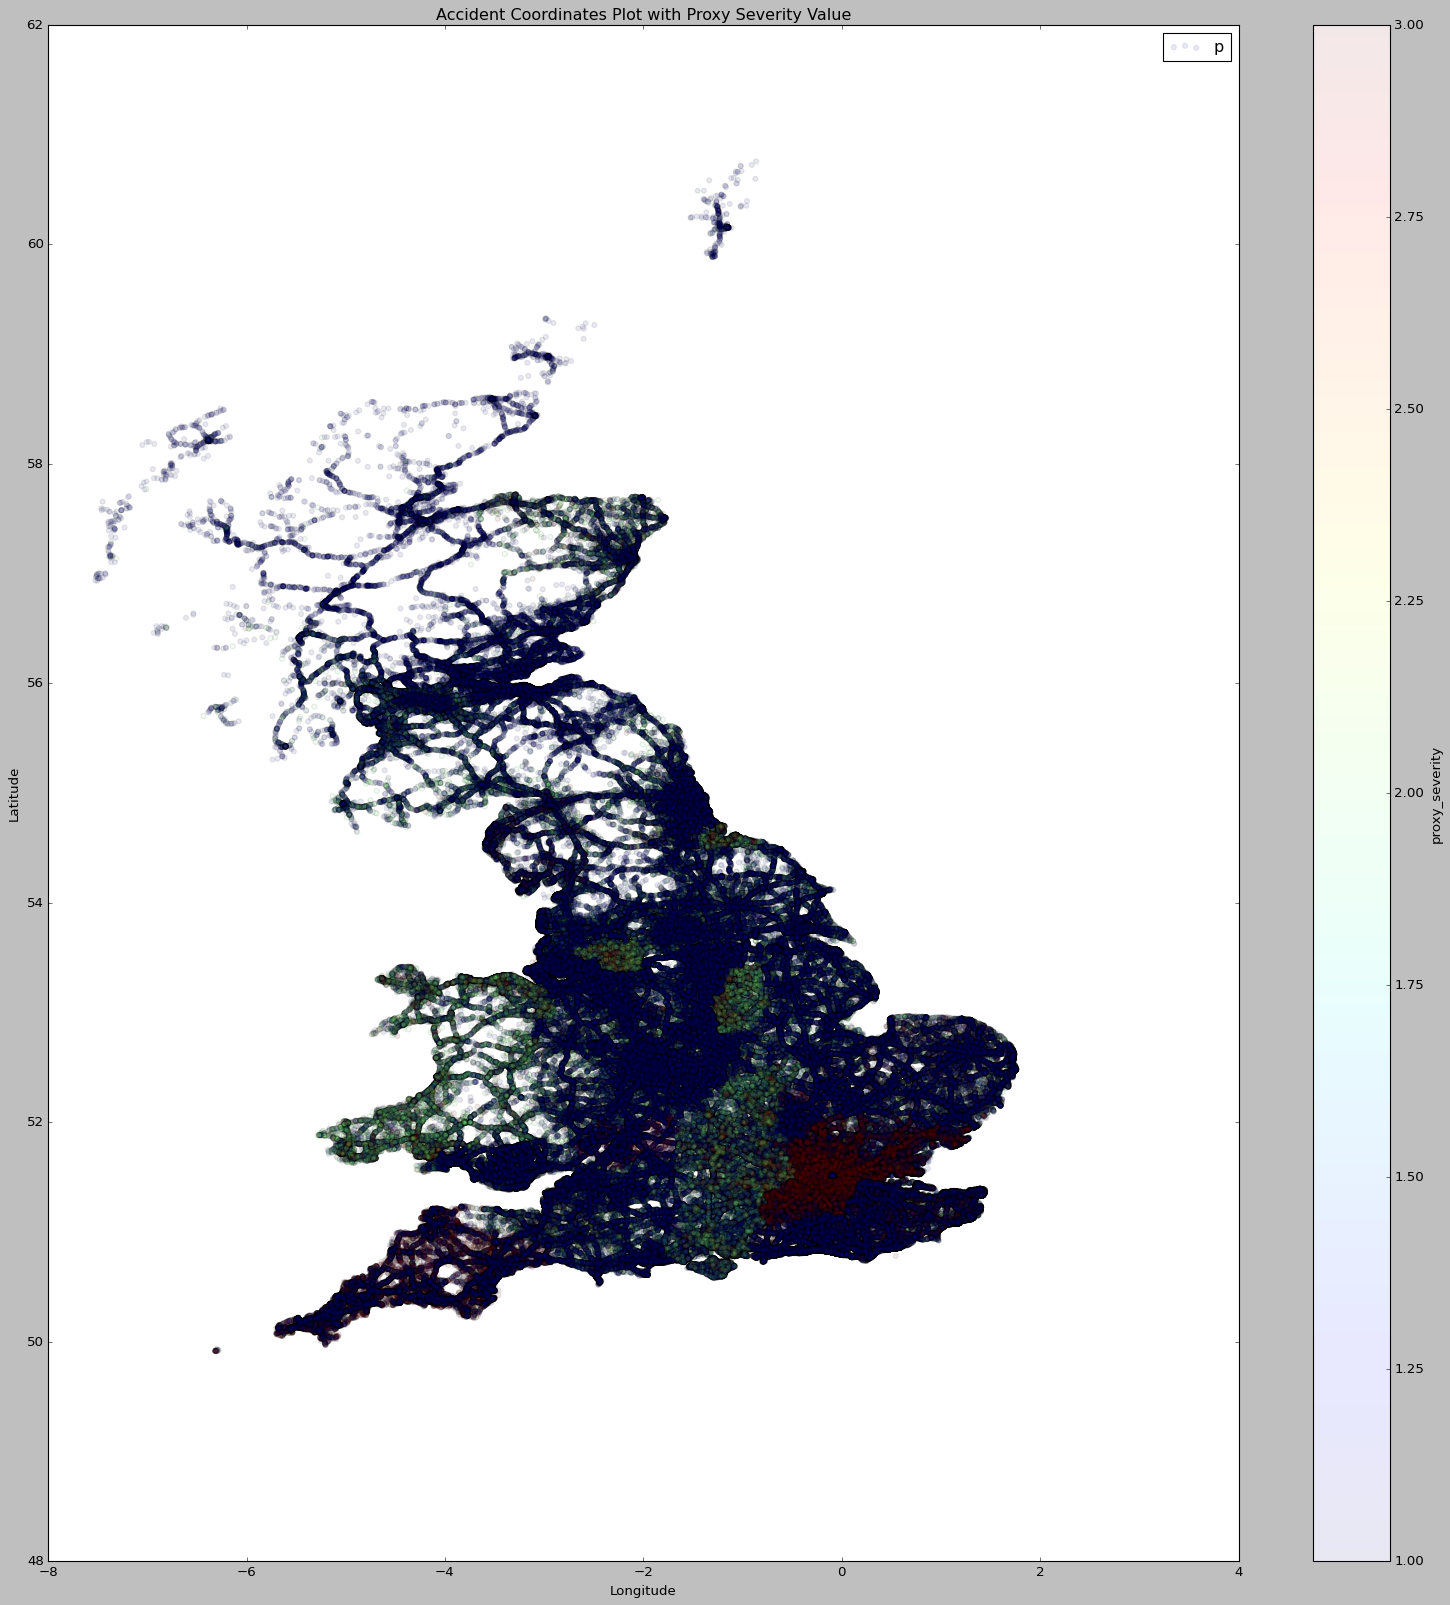

In [24]:
# view using proxy severity value
prep_drop_no_val.plot(kind="scatter", x="longitude", y = "latitude", cmap="jet", c="proxy_severity", alpha=0.09, figsize=(24,24), 
        )
plt.title("Accident Coordinates Plot with Proxy Severity Value")
plt.legend("proxy_severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig("./plots/acc_proxy_scattermap.png")
plt.show()

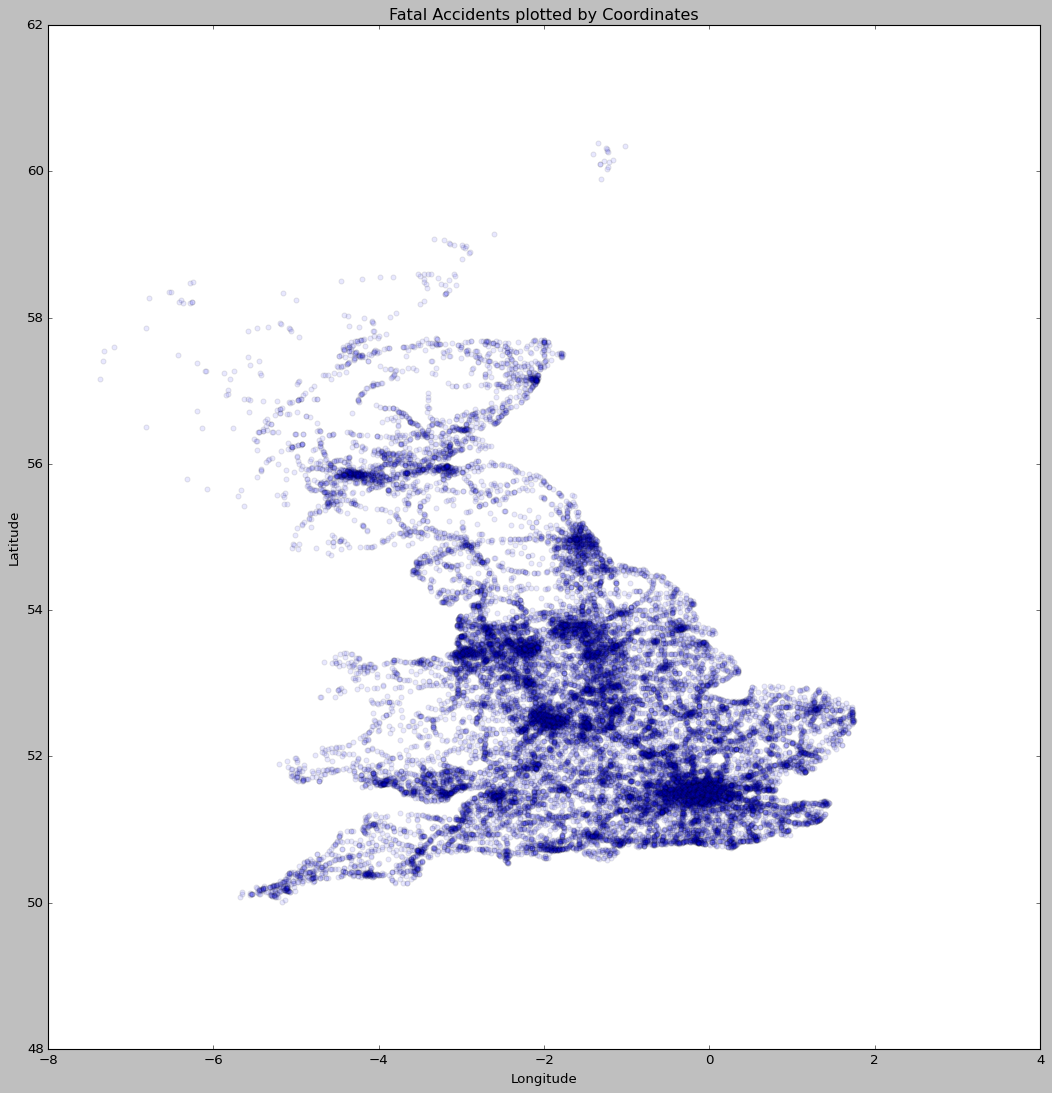

In [25]:
# fatal accidents plotted
prep_drop_no_val[prep_drop_no_val["accident_severity"] == 1].plot(kind="scatter", x="longitude", y = "latitude", cmap="jet", colorbar = False, alpha=0.09, figsize=(16,16), 
        )
plt.title("Fatal Accidents plotted by Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# plt.savefig("./plots/acc_proxy_scattermap.png")
plt.show()

In [26]:
# grouping longitude and latitudes
# create rounded longlats
acc_long_lats = prep_drop_no_val.copy()
acc_long_lats["adj_long"] = acc_long_lats["longitude"].round(0)
acc_long_lats["adj_lat"] = acc_long_lats["latitude"].round(0)

# summarise count by long-lat region
acc_long_lats["accident_count"] = acc_long_lats["accident_index"].groupby([acc_long_lats["adj_long"],acc_long_lats["adj_lat"]] ).transform("count")

# group adjusted longlat records with count
grouped_longlats = acc_long_lats.groupby(["adj_long", "adj_lat", "accident_count"]).agg({"accident_severity" : "mean"})
grouped_longlats.columns = ["average_severity"]
grouped_longlats = grouped_longlats.reset_index()

print(grouped_longlats.sort_values(by="accident_count", ascending=False).head(60))

    adj_long  adj_lat  accident_count  average_severity
57      -0.0     52.0          307245          2.853218
56      -0.0     51.0          260919          2.847133
41      -2.0     53.0          153736          2.847850
51      -1.0     53.0          137853          2.836072
49      -1.0     51.0          120126          2.814045
42      -2.0     54.0          113362          2.831266
40      -2.0     52.0          110281          2.824331
50      -1.0     52.0           93744          2.810185
32      -3.0     53.0           89657          2.820271
30      -3.0     51.0           61032          2.852749
52      -1.0     54.0           56390          2.792871
61       1.0     52.0           55708          2.802255
39      -2.0     51.0           54150          2.805614
33      -3.0     54.0           53010          2.805093
60       1.0     51.0           51975          2.843598
25      -4.0     56.0           51249          2.818221
43      -2.0     55.0           51179          2

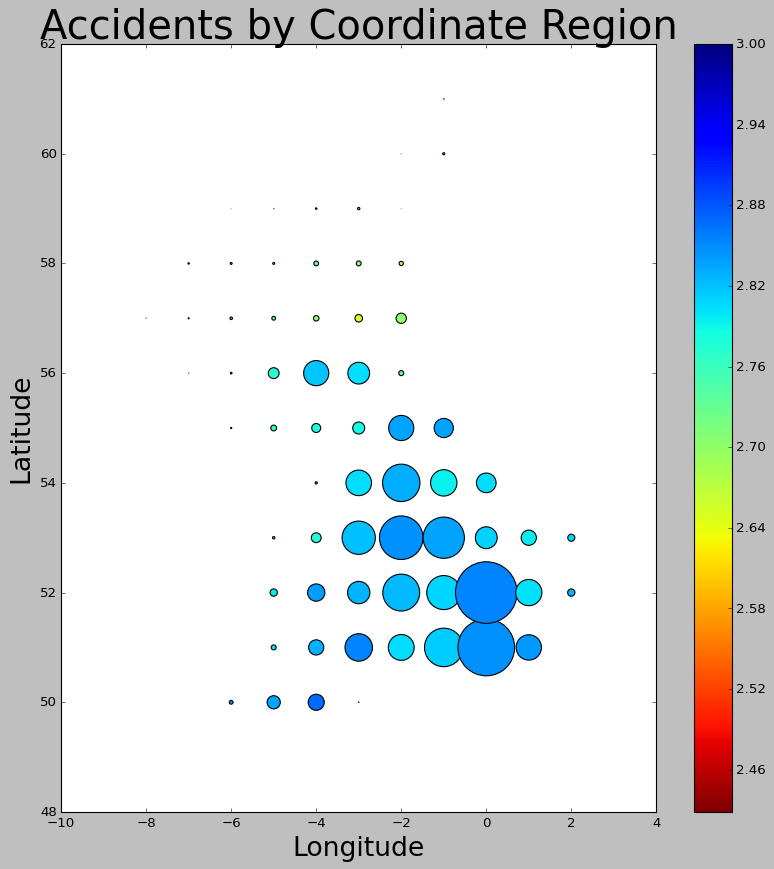

In [27]:
# view using accident severity and grouped bins
grouped_longlats.plot(kind="scatter", x="adj_long", y = "adj_lat", figsize=(12,12),
                   s=(grouped_longlats["accident_count"]*0.01),
                   c=grouped_longlats["average_severity"], cmap=plt.get_cmap("jet_r"), colorbar=True
        )
plt.title("Accidents by Coordinate Region", fontsize=36)
plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.savefig("./plots/acc_scattermap2_adjgeos_color.png")
plt.show()

### Categorical Data Types

In [28]:
# change categorical dtypes
cat_cols = ["police_force", "day", "district", "road_type", "light_conditions", 
            "weather_conditions", "road_surface_conditions", "urban_rural", "police_attended", "proxy_severity", "highway"]

prep_format_cats = acc_long_lats.copy()
prep_format_cats[cat_cols] = prep_format_cats[cat_cols].astype("category")

prep_format_cats.dtypes

accident_index               object
longitude                   float64
latitude                    float64
police_force               category
accident_severity             int64
num_veh                       int64
num_cas                       int64
date                         object
day                        category
time                         object
district                   category
highway                    category
road_type                  category
speed_limit                 float64
light_conditions           category
weather_conditions         category
road_surface_conditions    category
urban_rural                category
police_attended            category
adjusted_severity           float64
proxy_severity             category
adj_long                    float64
adj_lat                     float64
accident_count                int64
dtype: object

In [29]:
prep_format_cats.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,light_conditions,weather_conditions,road_surface_conditions,urban_rural,police_attended,adjusted_severity,proxy_severity,adj_long,adj_lat,accident_count
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,1,2,2,1,1,0.000000,1,-0.0,51.0,260919
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,4,1,1,1,1,0.985663,3,-0.0,52.0,307245
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,4,1,1,1,1,0.913618,2,-0.0,52.0,307245
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,1,1,1,1,1,0.825884,2,-0.0,51.0,260919
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,7,1,2,1,1,0.702079,1,-0.0,51.0,260919


#### Police Force


<AxesSubplot:>

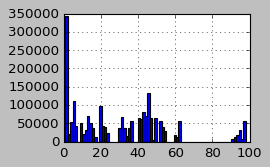

In [30]:
acc_prep = prep_format_cats.copy()
acc_prep.police_force.hist(bins = 75, figsize=(3,2))

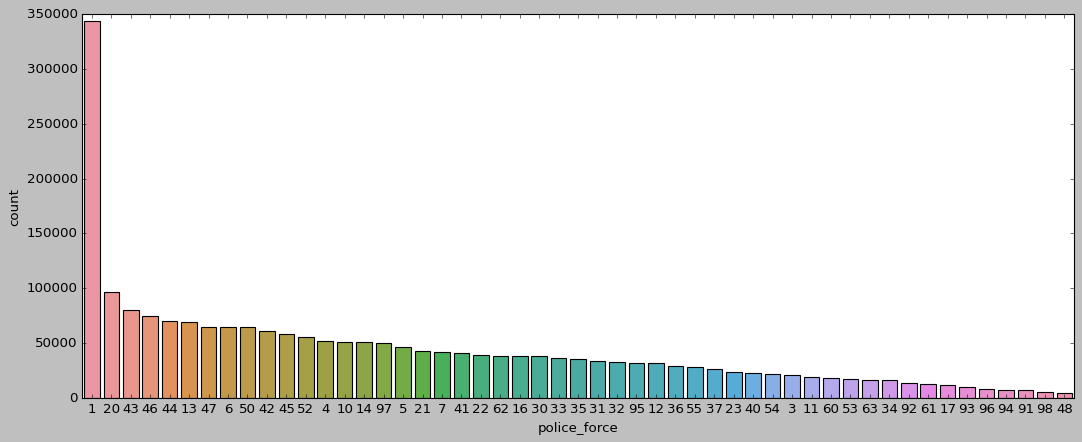

In [31]:
var = acc_prep["police_force"]
f, ax = plt.subplots(figsize=(16,6))
sns.countplot(x="police_force", data = acc_prep, order = acc_prep["police_force"].value_counts().index)
# plt.savefig("./plots/pol_countplot.png")
plt.show()

<AxesSubplot:xlabel='police_force'>

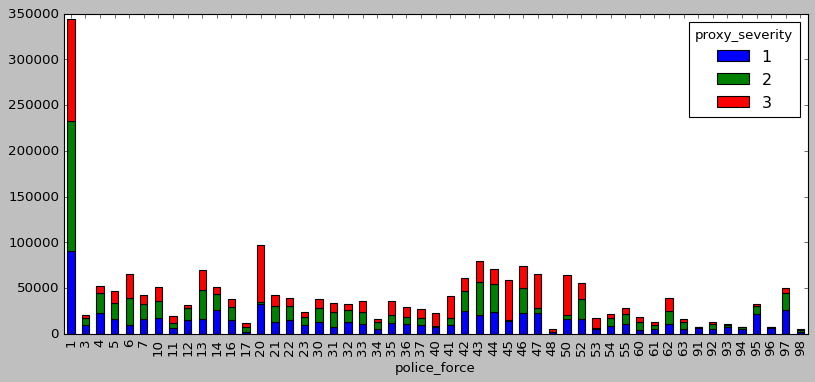

In [32]:
# plot accident severity by police force
pol_plot = acc_prep.groupby(['police_force', 'proxy_severity']) \
.size().reset_index().pivot(columns='proxy_severity', index='police_force', values=0)

pol_plot.plot(kind='bar', stacked=True, figsize=(12,5))
# plt.savefig("./plots/pol_countplot2_excl_metro.png")

<AxesSubplot:xlabel='police_force'>

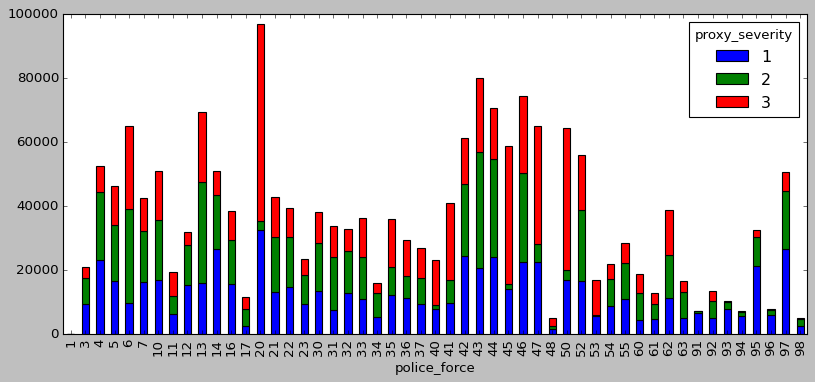

In [33]:
# plot accident severity by police force - Excluding Metro
pol_plot = acc_prep[acc_prep["police_force"] != 1].groupby(['police_force', 'proxy_severity']) \
.size().reset_index().pivot(columns='proxy_severity', index='police_force', values=0)

pol_plot.plot(kind='bar', stacked=True, figsize=(12,5))
# plt.savefig("./plots/pol_countplot2_excl_metro.png")

In [34]:
acc_prep.police_force.value_counts()

1     343924
20     96764
43     79952
46     74446
44     70435
13     69426
47     64897
6      64833
50     64263
42     61276
45     58564
52     55758
4      52307
10     50712
14     50711
97     50547
5      46271
21     42885
7      42328
41     40814
22     39327
62     38674
16     38211
30     37994
33     36124
35     35768
31     33541
32     32828
95     32270
12     31691
36     29332
55     28464
37     26676
23     23448
40     23023
54     21779
3      20932
11     19414
60     18527
53     16914
63     16497
34     16010
92     13320
61     12851
17     11419
93     10163
96      7875
94      7222
91      7012
98      5051
48      4911
Name: police_force, dtype: int64

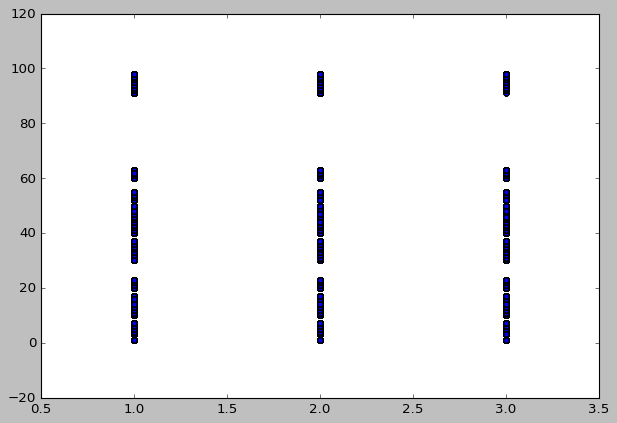

In [35]:
plt.figure(figsize=(9,6))
plt.scatter(acc_prep["proxy_severity"],acc_prep["police_force"])
plt.show()

In [36]:
# acc_prep_police = acc_prep.copy()
# acc_prep_police["metropolitan_police"] = np.where(acc_prep_police["police_force"] == 1, 1 , 0)
# acc_prep_police.metropolitan_police.value_counts()

# note not going to include this variable, will retain the individual police forces

### Number of Vehicles
- should I come back to this and group for 1,2,3,4,>4 - or keep variable continuous? 

<AxesSubplot:>

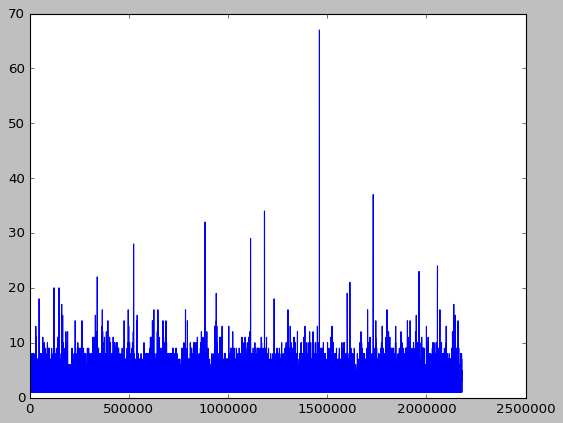

In [37]:
acc_prep_num_veh = acc_prep.copy()
acc_prep_num_veh.num_veh.plot()

##### Created a categorical group for number of vehicles
Any accidents with > 4 vehicles involved have been grouped.

In [38]:
acc_prep_num_veh["num_veh_group"] = np.where(acc_prep_num_veh["num_veh"] >= 3 , "3+", acc_prep_num_veh["num_veh"].astype(str))
acc_prep_num_veh["num_veh_group"].value_counts()

2     1299665
1      654243
3+     224473
Name: num_veh_group, dtype: int64

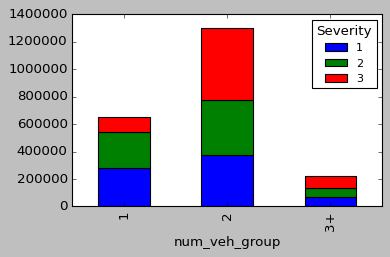

In [39]:
# plot accident severity by numbner of vehicles force - Excluding Metro
num_veh_plot = acc_prep_num_veh.groupby(['num_veh_group', 'proxy_severity']) \
.size().reset_index().pivot(columns='proxy_severity', index='num_veh_group', values=0)
plot = num_veh_plot.plot(kind='bar', stacked=True, figsize=(5,3))
plot.legend(title="Severity", loc=1, prop={'size': 10})
# plt.savefig("./plots/nVeh_countplot1.png")

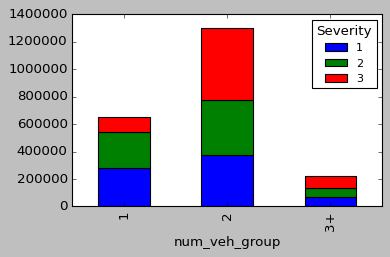

In [40]:
# plot accident severity by numbner of vehicles force - Excluding Metro
num_veh_plot_prxy = acc_prep_num_veh.groupby(['num_veh_group', 'proxy_severity']) \
.size().reset_index().pivot(columns='proxy_severity', index='num_veh_group', values=0)
plot = num_veh_plot.plot(kind='bar', stacked=True, figsize=(5,3))
plot.legend(title="Severity", loc=1, prop={'size': 10})
# plt.savefig("./plots/nVeh_proxy_countplot1.png")

### Number of Casualties

In [41]:
acc_prep_num_cas = acc_prep_num_veh.copy()
acc_prep_num_cas["num_cas"].value_counts()

1     1680300
2      343628
3       98109
4       35146
5       12940
6        4837
7        1675
8         720
9         352
10        195
11        121
12         71
13         56
14         36
15         23
16         22
17         21
19         15
18         12
22         11
21         11
26          8
23          6
29          6
20          6
27          5
25          5
24          5
36          4
42          3
41          2
38          2
45          2
43          2
40          2
35          2
33          2
87          2
28          2
51          2
54          1
70          1
68          1
63          1
62          1
32          1
52          1
48          1
47          1
46          1
34          1
93          1
Name: num_cas, dtype: int64

In [42]:
# create number of casualty groups
acc_prep_num_cas["num_cas_group"] = np.where(acc_prep_num_cas["num_cas"] >= 3 , "3+", acc_prep_num_cas["num_cas"].astype(str))
acc_prep_num_cas["num_cas_group"].value_counts()

1     1680300
2      343628
3+     154453
Name: num_cas_group, dtype: int64

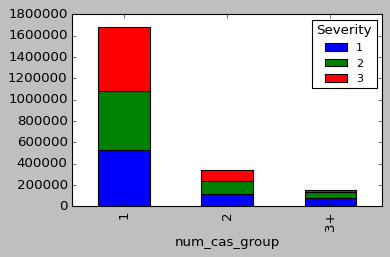

In [43]:
# plot accident severity by numbner of vehicles force - Excluding Metro
num_cas_plot = acc_prep_num_cas.groupby(['num_cas_group', 'proxy_severity']) \
.size().reset_index().pivot(columns='proxy_severity', index='num_cas_group', values=0)
plot = num_cas_plot.plot(kind='bar', stacked=True, figsize=(5,3))
plot.legend(title="Severity", loc=1, prop={'size': 10})
# plt.savefig("./plots/nCas_countplot1.png")

### Day of Week

<AxesSubplot:>

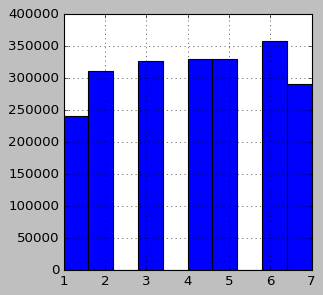

In [44]:
acc_prep_day = acc_prep_num_cas.copy()

# initial plot
acc_prep_day.day.hist(figsize=(4,4))

In [45]:
# # SAVE PROGRESS to PICKLE
# with open("./data/working_sets/accident_data_prep.pkl", "wb") as f: # wb = write binary
#     pickle.dump(acc_prep_day, f)

### District


In [46]:
acc_prep_dist = acc_prep_day.copy()

<AxesSubplot:>

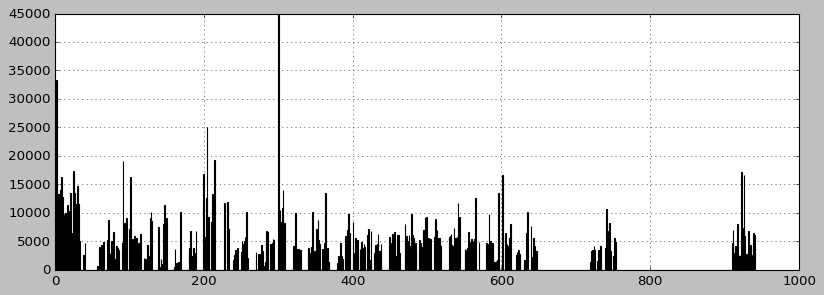

In [47]:
acc_prep_dist.district.hist(bins=900,figsize=(12,4))

In [48]:
acc_prep_dist.district.dtype

CategoricalDtype(categories=[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
                  ...
                  932, 933, 934, 935, 936, 937, 938, 939, 940, 941],
                 ordered=False)

In [49]:
acc_prep_dist.district.value_counts()

300    44790
204    25093
1      21421
215    19181
91     19061
       ...  
941      426
936      365
141      337
166      318
933      295
Name: district, Length: 416, dtype: int64

In [50]:
acc_prep_dist.district.nunique()

416

In [51]:
acc_prep_dist.district.value_counts().median()

4271.0

In [52]:
acc_prep_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178381 entries, 0 to 2178380
Data columns (total 26 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   accident_index           object  
 1   longitude                float64 
 2   latitude                 float64 
 3   police_force             category
 4   accident_severity        int64   
 5   num_veh                  int64   
 6   num_cas                  int64   
 7   date                     object  
 8   day                      category
 9   time                     object  
 10  district                 category
 11  highway                  category
 12  road_type                category
 13  speed_limit              float64 
 14  light_conditions         category
 15  weather_conditions       category
 16  road_surface_conditions  category
 17  urban_rural              category
 18  police_attended          category
 19  adjusted_severity        float64 
 20  proxy_severity          

### Highway

In [53]:
acc_prep_high = acc_prep_dist.copy()

<AxesSubplot:>

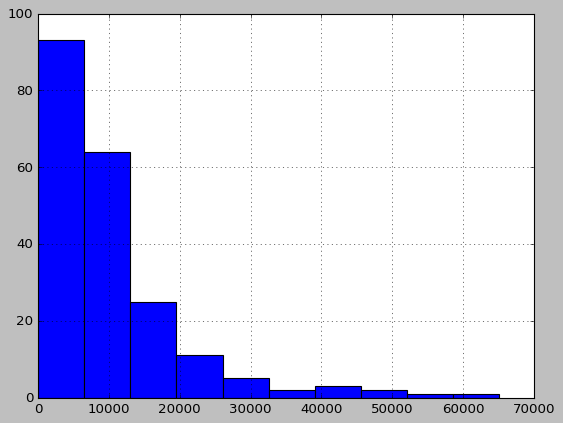

In [54]:
acc_prep_high.highway.value_counts().hist()

In [55]:
acc_prep_high.highway.describe()

count       2178381
unique          207
top       E10000016
freq          65122
Name: highway, dtype: object

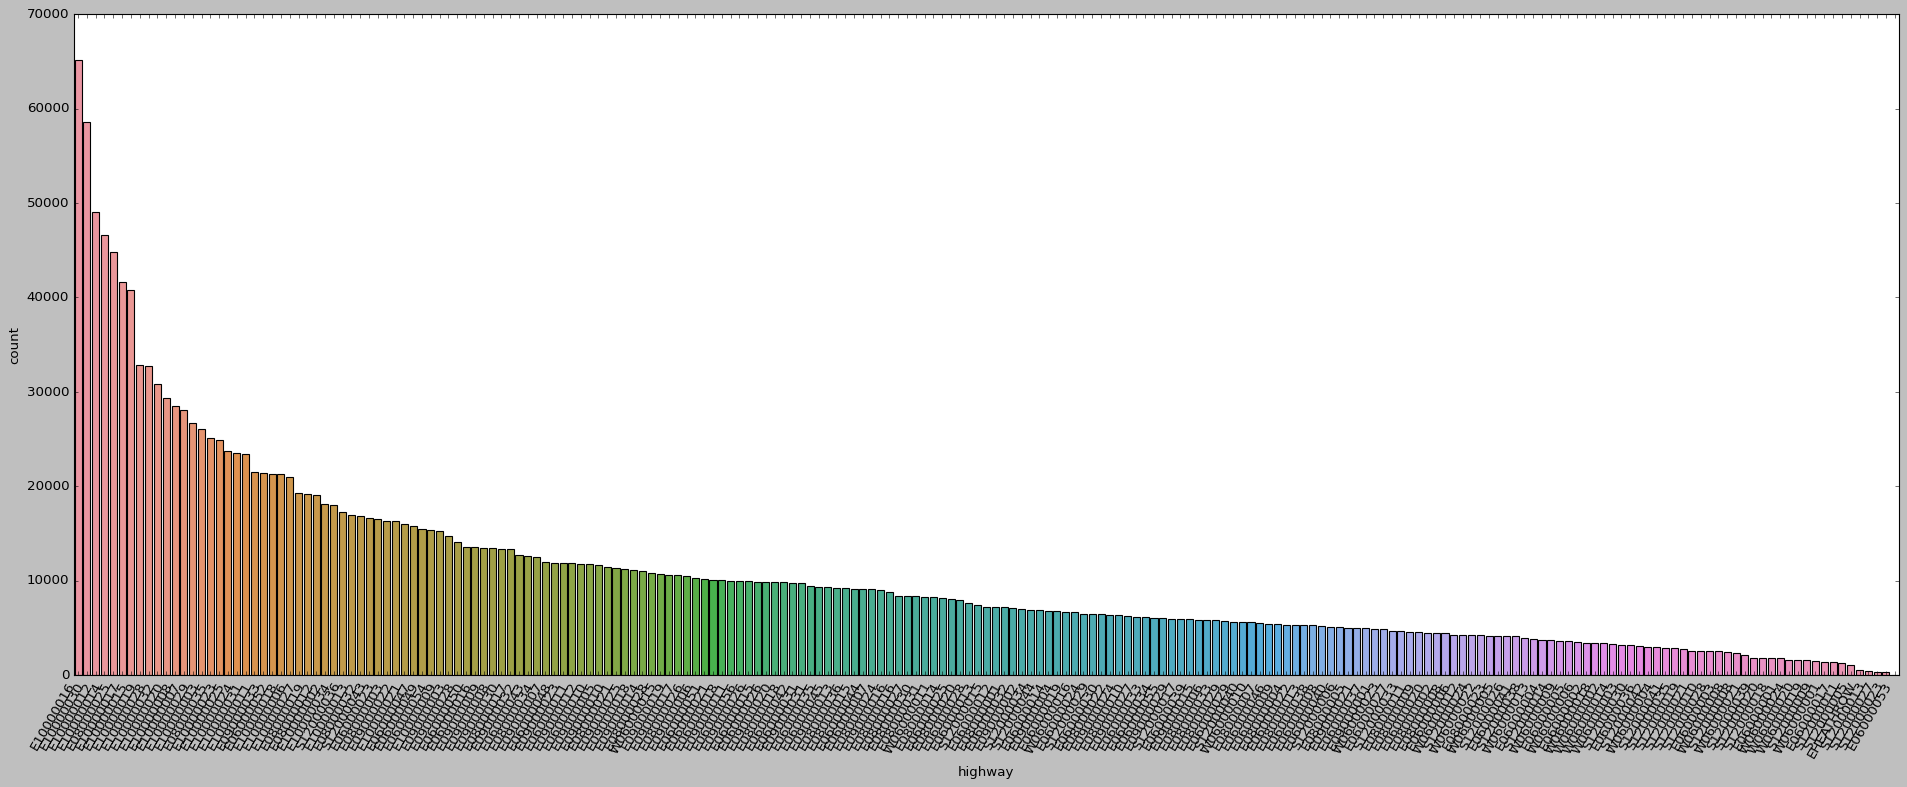

In [56]:
var = acc_prep_high["highway"]
f, ax = plt.subplots(figsize=(24,10))
sns.countplot(x="highway", data = acc_prep_high, order = acc_prep_high["highway"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
# plt.savefig("./plots/pol_countplot.png")
plt.show()

<AxesSubplot:>

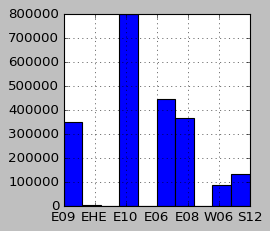

In [57]:
# look at shortened codes (ONS / GSS Codes)
acc_prep_high["ons_code"] =  acc_prep_high["highway"].str.slice(stop=3).astype("category")
acc_prep_high.ons_code.hist(figsize=(3,3))

In [58]:
acc_prep_high.ons_code.value_counts()

E10    799589
E06    443088
E08    366860
E09    348276
S12    133460
W06     86549
EHE       559
Name: ons_code, dtype: int64

In [59]:
# reviewing what the EHE code means - might come back to this and merge Heathrow somewhere else to remove tiny category
acc_prep_high.loc[acc_prep_high.ons_code == "EHE"].highway.head()

6295    EHEATHROW
6297    EHEATHROW
6298    EHEATHROW
6299    EHEATHROW
6300    EHEATHROW
Name: highway, dtype: category
Categories (207, object): ['E06000001', 'E06000002', 'E06000003', 'E06000004', ..., 'W06000021', 'W06000022', 'W06000023', 'W06000024']

In [60]:
mean_count = acc_prep_high.highway.value_counts().mean()
mean_count = acc_prep_high.highway.value_counts().mean()

### Road Type

Creating two categories for road type (single carriageway or 'other')


<AxesSubplot:>

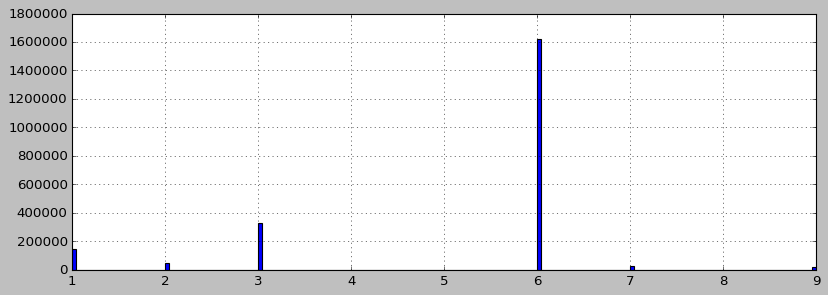

In [61]:
acc_prep_road = acc_prep_high.copy()

acc_prep_road.road_type.hist(bins=200,figsize=(12,4))

In [62]:
acc_prep_road.road_type.value_counts()

6    1621323
3     326628
1     144538
2      46512
7      23913
9      15467
Name: road_type, dtype: int64

In [63]:
acc_prep_road["single_carriageway"] = np.where(acc_prep_road.road_type == 6, 1,0)

In [64]:
acc_prep_road.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,police_attended,adjusted_severity,proxy_severity,adj_long,adj_lat,accident_count,num_veh_group,num_cas_group,ons_code,single_carriageway
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,1,0.000000,1,-0.0,51.0,260919,1,1,E09,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,1,0.985663,3,-0.0,52.0,307245,1,1,E09,0
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,1,0.913618,2,-0.0,52.0,307245,2,1,E09,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,1,0.825884,2,-0.0,51.0,260919,1,1,E09,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,1,0.702079,1,-0.0,51.0,260919,1,1,E09,1


<AxesSubplot:>

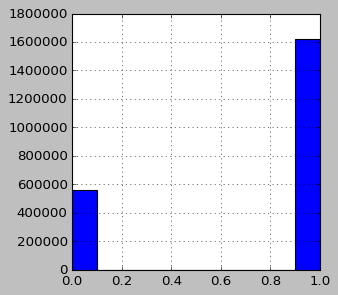

In [65]:
acc_prep_road.single_carriageway.hist(figsize=(4,4))

### Speed Limit

<AxesSubplot:>

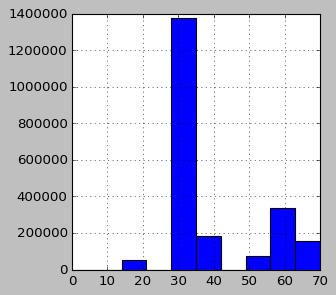

In [66]:
acc_prep_speed = acc_prep_road.copy()
acc_prep_speed.speed_limit.hist(figsize=(4,4))

<AxesSubplot:>

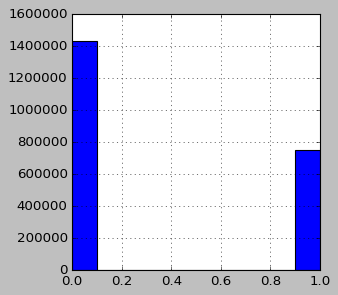

In [67]:
# create speed limit bins for 30 or >30 mph
acc_prep_speed["speed_limit_over_30mph"] = np.where(acc_prep_speed["speed_limit"] > 30, 1, 0)
acc_prep_speed.speed_limit_over_30mph.hist(figsize=(4,4))

### Light Conditions

<AxesSubplot:>

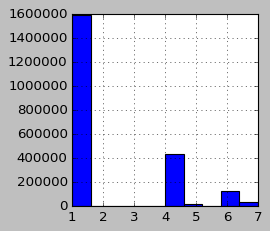

In [71]:
acc_prep_light = acc_prep_speed.copy()
acc_prep_light.light_conditions.hist(figsize=(3,3))

<AxesSubplot:>

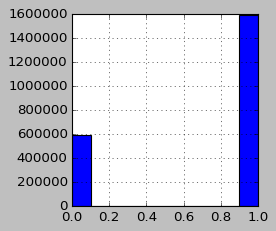

In [72]:
acc_prep_light = acc_prep_speed.copy()
acc_prep_light["good_light"] = np.where(acc_prep_light.light_conditions == 1 , 1 , 0)
acc_prep_light.good_light.hist(figsize=(3,3))

### Weather Conditions

<AxesSubplot:>

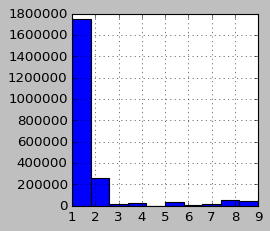

In [73]:
acc_prep_weather = acc_prep_light.copy()
acc_prep_weather.weather_conditions.hist(figsize=(3,3))

<AxesSubplot:>

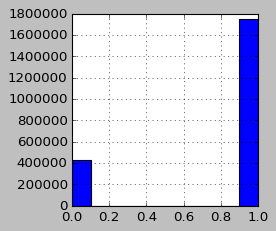

In [74]:
acc_prep_weather["fine_weather"] = np.where(acc_prep_weather.weather_conditions == 1 , 1 , 0)
acc_prep_weather.fine_weather.hist(figsize=(3,3))

### Road Surface Conditions

<AxesSubplot:>

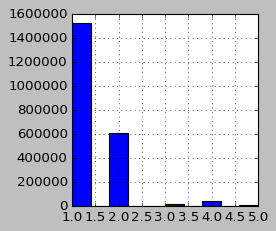

In [75]:
acc_prep_road_surface = acc_prep_weather.copy()
acc_prep_road_surface.road_surface_conditions.hist(figsize=(3,3))

<AxesSubplot:>

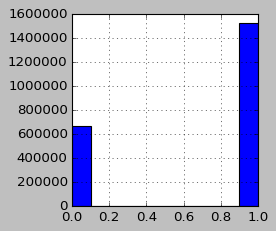

In [76]:
acc_prep_road_surface["road_surface_okay"] =  np.where(acc_prep_road_surface.road_surface_conditions == 1 , 1 , 0)
acc_prep_road_surface.road_surface_okay.hist(figsize=(3,3))

In [77]:
# # SAVE PROGRESS to PICKLE
# with open("./data/working_sets/accident_data_prep.pkl", "wb") as f: # wb = write binary
#     pickle.dump(acc_prep_road_surface, f)

In [78]:
acc_prep_road_surface.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178381 entries, 0 to 2178380
Data columns (total 32 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   accident_index           object  
 1   longitude                float64 
 2   latitude                 float64 
 3   police_force             category
 4   accident_severity        int64   
 5   num_veh                  int64   
 6   num_cas                  int64   
 7   date                     object  
 8   day                      category
 9   time                     object  
 10  district                 category
 11  highway                  category
 12  road_type                category
 13  speed_limit              float64 
 14  light_conditions         category
 15  weather_conditions       category
 16  road_surface_conditions  category
 17  urban_rural              category
 18  police_attended          category
 19  adjusted_severity        float64 
 20  proxy_severity          

### Date and Time

In [79]:
test = acc_prep_road_surface.sample(100)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 574155 to 5004
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   accident_index           100 non-null    object  
 1   longitude                100 non-null    float64 
 2   latitude                 100 non-null    float64 
 3   police_force             100 non-null    category
 4   accident_severity        100 non-null    int64   
 5   num_veh                  100 non-null    int64   
 6   num_cas                  100 non-null    int64   
 7   date                     100 non-null    object  
 8   day                      100 non-null    category
 9   time                     100 non-null    object  
 10  district                 100 non-null    category
 11  highway                  100 non-null    category
 12  road_type                100 non-null    category
 13  speed_limit              100 non-null    float64 
 14  ligh

In [80]:
test["time_of_day"] = np.where(test.time > "12:00:00", "AM", "PM") 

In [81]:
test[["time", "time_of_day"]]

,time,time_of_day
574155,14:31:00,AM
841291,19:30:00,AM
1421718,13:30:00,AM
1425932,07:55:00,PM
37575,00:10:00,PM
...,...,...
491008,21:20:00,AM
1026978,18:11:00,AM
787923,11:05:00,PM
1547582,14:10:00,AM


In [82]:
acc_prep_datetime = acc_prep_road_surface.copy()

<AxesSubplot:>

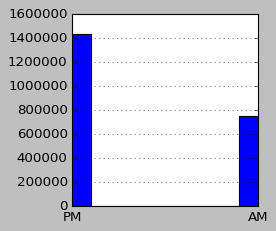

In [83]:
# time of day
acc_prep_datetime["time_of_day"] = np.where(acc_prep_datetime.time > "12:00:00", "PM", "AM")
acc_prep_datetime.time_of_day.hist(figsize=(3,3))

In [84]:
# year and month
acc_prep_datetime["year"] = pd.DatetimeIndex(acc_prep_datetime["date"]).year
acc_prep_datetime["month"] = pd.DatetimeIndex(acc_prep_datetime["date"]).month
acc_prep_datetime[["date", "year", "month"]]

,date,year,month
0,2005-04-01,2005,4
1,2005-05-01,2005,5
2,2005-06-01,2005,6
3,2005-07-01,2005,7
4,2005-10-01,2005,10
...,...,...,...
2178376,2019-05-30,2019,5
2178377,2019-05-18,2019,5
2178378,2019-05-30,2019,5
2178379,2019-06-21,2019,6


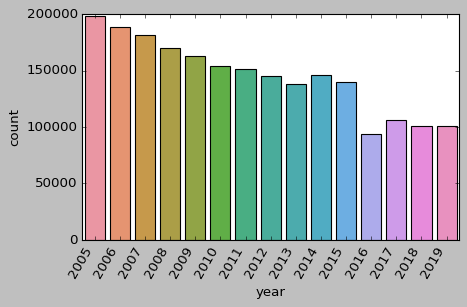

In [85]:
var = acc_prep_datetime["year"]
f, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="year", data = acc_prep_datetime)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
# plt.savefig("./plots/pol_countplot.png")
plt.show()

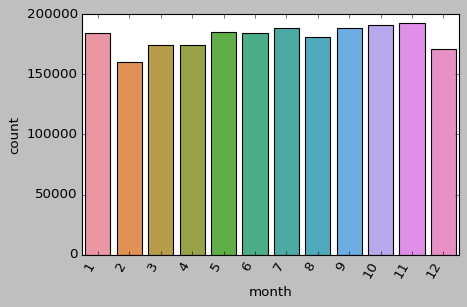

In [86]:
var = acc_prep_datetime["month"]
f, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="month", data = acc_prep_datetime)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
# plt.savefig("./plots/pol_countplot.png")
plt.show()

In [87]:
acc_prep_datetime.year.value_counts()

2005    198192
2006    188880
2007    181850
2008    170314
2009    163326
2010    154185
2011    151241
2014    146099
2012    145305
2015    139666
2013    138393
2017    106078
2019    100599
2018    100514
2016     93739
Name: year, dtype: int64

### Did Police Officer Attend?

<AxesSubplot:>

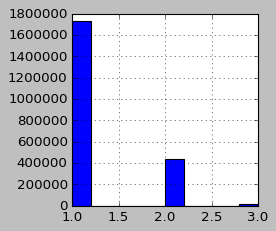

In [88]:
acc_prep_police_attend = acc_prep_datetime.copy()
acc_prep_police_attend.police_attended.hist(figsize=(3,3))

In [89]:
acc_prep_police_attend.police_attended = np.where(acc_prep_police_attend.police_attended == 1, 1,0)

In [90]:
acc_prep_police_attend.police_attended.nunique()

2

### Urban or Rural?

<AxesSubplot:>

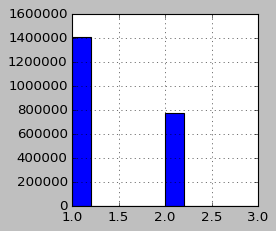

In [91]:
acc_prep_urban = acc_prep_police_attend.copy()
acc_prep_urban.urban_rural.hist(figsize=(3,3))

In [92]:
acc_prep_urban["urban_area"] = np.where(acc_prep_urban.urban_rural == 1, 1 , 0)

In [93]:
acc_prep_urban.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,ons_code,single_carriageway,speed_limit_over_30mph,good_light,fine_weather,road_surface_okay,time_of_day,year,month,urban_area
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,E09,1,0,1,0,0,PM,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,E09,0,0,0,1,1,PM,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,E09,1,0,0,1,1,AM,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,E09,1,0,1,1,1,AM,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,E09,1,0,0,1,0,PM,2005,10,1


<AxesSubplot:>

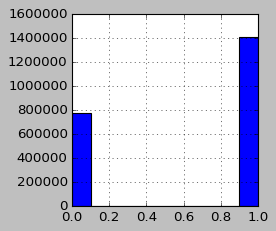

In [94]:
acc_prep_urban.urban_area.hist(figsize=(3,3))

### -- END OF INITIAL DATA PREPARATION -- 

In [95]:
acc_prepared_set = acc_prep_urban.copy()

In [97]:
# SAVE PREPARED DATASET to PICKLE - PRE DROP COLS
with open("./data/working_sets/new_acc_prepared_set.pkl", "wb") as f: # wb = write binary
    pickle.dump(acc_prepared_set, f)

## Prepare for Machine Learning

In [98]:
# # LOAD PREPARED DATASET to PICKLE - PRE DROP COLS
# with open("./data/working_sets/acc_prepared_set.pkl", "rb") as f: # wb = write binary
#     ml_acc_prep = pickle.load(f)

In [99]:
ml_acc_prep = acc_prepared_set.copy()

In [100]:
ml_acc_prep.dtypes

accident_index               object
longitude                   float64
latitude                    float64
police_force               category
accident_severity             int64
num_veh                       int64
num_cas                       int64
date                         object
day                        category
time                         object
district                   category
highway                    category
road_type                  category
speed_limit                 float64
light_conditions           category
weather_conditions         category
road_surface_conditions    category
urban_rural                category
police_attended               int32
adjusted_severity           float64
proxy_severity             category
adj_long                    float64
adj_lat                     float64
accident_count                int64
num_veh_group                object
num_cas_group                object
ons_code                   category
single_carriageway          

In [102]:
# categorise new attributes
catcols = ["accident_index","num_veh_group", "num_cas_group","single_carriageway", "highway", "speed_limit_over_30mph", 
           "good_light", "fine_weather", "road_surface_okay", "time_of_day", "year", "month", "day", "urban_area"]
ml_acc_prep[catcols] = ml_acc_prep[catcols].astype("category")
ml_acc_prep.head()

,accident_index,longitude,latitude,police_force,accident_severity,num_veh,num_cas,date,day,time,...,ons_code,single_carriageway,speed_limit_over_30mph,good_light,fine_weather,road_surface_okay,time_of_day,year,month,urban_area
0,200501BS00001,-0.191170,51.489096,1,2,1,1,2005-04-01,3,17:42:00,...,E09,1,0,1,0,0,PM,2005,4,1
1,200501BS00002,-0.211708,51.520075,1,3,1,1,2005-05-01,4,17:36:00,...,E09,0,0,0,1,1,PM,2005,5,1
2,200501BS00003,-0.206458,51.525301,1,3,2,1,2005-06-01,5,00:15:00,...,E09,1,0,0,1,1,AM,2005,6,1
3,200501BS00004,-0.173862,51.482442,1,3,1,1,2005-07-01,6,10:35:00,...,E09,1,0,1,1,1,AM,2005,7,1
4,200501BS00005,-0.156618,51.495752,1,3,1,1,2005-10-01,2,21:13:00,...,E09,1,0,0,1,0,PM,2005,10,1


In [103]:
ml_acc_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178381 entries, 0 to 2178380
Data columns (total 36 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   accident_index           category
 1   longitude                float64 
 2   latitude                 float64 
 3   police_force             category
 4   accident_severity        int64   
 5   num_veh                  int64   
 6   num_cas                  int64   
 7   date                     object  
 8   day                      category
 9   time                     object  
 10  district                 category
 11  highway                  category
 12  road_type                category
 13  speed_limit              float64 
 14  light_conditions         category
 15  weather_conditions       category
 16  road_surface_conditions  category
 17  urban_rural              category
 18  police_attended          int32   
 19  adjusted_severity        float64 
 20  proxy_severity          

In [104]:
# drop updated / unwanted attributes
dropcols = ["accident_index","longitude", "latitude","accident_severity", "num_veh", "num_cas", 
            "date", "time", "speed_limit", "light_conditions", "weather_conditions", 
           "road_surface_conditions", "adjusted_severity", "accident_count", "highway", "district", "police_attended", "urban_rural"]

ml_acc = ml_acc_prep.drop(dropcols, axis = 1)

In [105]:
ml_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178381 entries, 0 to 2178380
Data columns (total 18 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   police_force            category
 1   day                     category
 2   road_type               category
 3   proxy_severity          category
 4   adj_long                float64 
 5   adj_lat                 float64 
 6   num_veh_group           category
 7   num_cas_group           category
 8   ons_code                category
 9   single_carriageway      category
 10  speed_limit_over_30mph  category
 11  good_light              category
 12  fine_weather            category
 13  road_surface_okay       category
 14  time_of_day             category
 15  year                    category
 16  month                   category
 17  urban_area              category
dtypes: category(16), float64(2)
memory usage: 66.5 MB


In [106]:
ml_acc.nunique()

police_force              51
day                        7
road_type                  6
proxy_severity             3
adj_long                  11
adj_lat                   12
num_veh_group              3
num_cas_group              3
ons_code                   7
single_carriageway         2
speed_limit_over_30mph     2
good_light                 2
fine_weather               2
road_surface_okay          2
time_of_day                2
year                      15
month                     12
urban_area                 2
dtype: int64

In [107]:
# SAVE PREPARED DATASET to PICKLE - PRE DROP COLS
with open("./data/working_sets/new_acc_ml_dataset.pkl", "wb") as f: # wb = write binary
    pickle.dump(ml_acc, f)

In [108]:
ml_acc.head()

,police_force,day,road_type,proxy_severity,adj_long,adj_lat,num_veh_group,num_cas_group,ons_code,single_carriageway,speed_limit_over_30mph,good_light,fine_weather,road_surface_okay,time_of_day,year,month,urban_area
0,1,3,6,1,-0.0,51.0,1,1,E09,1,0,1,0,0,PM,2005,4,1
1,1,4,3,3,-0.0,52.0,1,1,E09,0,0,0,1,1,PM,2005,5,1
2,1,5,6,2,-0.0,52.0,2,1,E09,1,0,0,1,1,AM,2005,6,1
3,1,6,6,2,-0.0,51.0,1,1,E09,1,0,1,1,1,AM,2005,7,1
4,1,2,6,1,-0.0,51.0,1,1,E09,1,0,0,1,0,PM,2005,10,1


In [109]:
# ml_acc.to_csv("./data/working_sets/ml_acc_set.csv", index=False)

In [110]:
ml_acc.proxy_severity.value_counts()

1    726272
3    726055
2    726054
Name: proxy_severity, dtype: int64